In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


## Loading data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


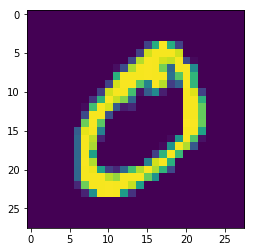

In [4]:
plt.imshow(x_train[1])
plt.show()

## Some Constants

In [5]:
_,ROWS,COLS=x_train.shape
INPUT_SHAPE = (ROWS,COLS, 1)  #There is only one channel
NUM_CLASSES=10
BATCH_SIZE=526
EPOCHS=20
print(INPUT_SHAPE)

(28, 28, 1)


## Defining Model

In [23]:

def basic_model():
    checkpoint = ModelCheckpoint("model1-weights.hdf5", monitor='val_loss'
                                 , verbose=1, save_best_only=True)
    callbacks_list = [checkpoint]

    model=Sequential()
    model.add(Conv2D(3,(1,1),input_shape=INPUT_SHAPE))
    model.add(Conv2D(32,(3,3),activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(NUM_CLASSES, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    model_json = model.to_json()
    with open("model.json", "w") as json_file:
        json_file.write(model_json)
    return model,callbacks_list

## Normalizing Data

In [7]:
x_train=(x_train/255.0)-0.5
x_test=(x_test/255.0)-0.5
y_train=keras.utils.to_categorical(y_train,NUM_CLASSES)
y_test=keras.utils.to_categorical(y_test,NUM_CLASSES)

x_train=x_train.reshape(-1,ROWS,COLS,1)
x_test=x_test.reshape(-1,ROWS,COLS,1)
print(x_train.shape,x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


## Training

In [24]:
model,callbacks_list=basic_model()
history=model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          callbacks=callbacks_list,
          verbose=1,validation_split=0.2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 83s - loss: 0.5720 - acc: 0.8224 - val_loss: 0.1192 - val_acc: 0.9663
Epoch 2/20
48000/48000 [==============================] - 82s - loss: 0.1501 - acc: 0.9567 - val_loss: 0.0674 - val_acc: 0.9798
Epoch 3/20
48000/48000 [==============================] - 82s - loss: 0.1053 - acc: 0.9696 - val_loss: 0.0585 - val_acc: 0.9828
Epoch 4/20
48000/48000 [==============================] - 83s - loss: 0.0837 - acc: 0.9758 - val_loss: 0.0488 - val_acc: 0.9852
Epoch 5/20
48000/48000 [==============================] - 82s - loss: 0.0690 - acc: 0.9796 - val_loss: 0.0441 - val_acc: 0.9875
Epoch 6/20
48000/48000 [==============================] - 83s - loss: 0.0613 - acc: 0.9814 - val_loss: 0.0451 - val_acc: 0.9870
Epoch 7/20
48000/48000 [==============================] - 87s - loss: 0.0528 - acc: 0.9841 - val_loss: 0.0431 - val_acc: 0.9873
Epoch 8/20
48000/48000 [==============================

In [12]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0322406624678
Test accuracy: 0.9916


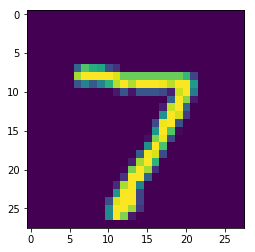

[  1.03919653e-16   4.14533382e-12   3.98101213e-12   1.84488758e-09
   3.89246282e-17   4.45932936e-16   2.51550653e-22   1.00000000e+00
   4.38436985e-16   1.66127858e-11]


In [22]:
# prediction=model.predict(x_test)
plt.imshow(x_test[0].reshape(28,28))
plt.show()
print(prediction[0])